In [ ]:
from matplotlib import pyplot as plt
import numpy as np
np.random.seed(1)

In [ ]:
n = 300                 ## number of inputs
N = 24                  ## number of neurons
eta = 0.01                ## learning rate
num_epochs = 1000      ## number of epochs

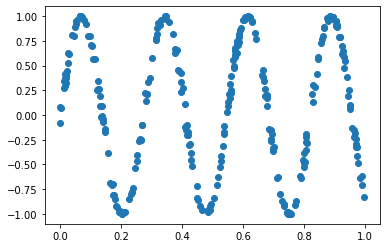

In [ ]:
x = np.random.uniform(0,1,n)
y = np.random.uniform(0,1,n)
v = np.random.uniform(-.1,.1,n)
d = [np.sin(20*x[i]+3*x[i]+v[i]) for i in range(n)]
darr = np.array(d)
v2_list = np.ones(n)
v1_list = np.ones((n, N))
w = np.random.normal(-1,1,3*N+1)
plt.scatter(x, d, marker='o')

In [ ]:
def tanh(x):                                    ## tanh function
    return np.tanh(x)

def tanh_prime(x):
    return 1 - np.square(np.tanh(x))            ## tanh derivative function

def forward(xarr, warr):
    mse = 0
    y2 = np.zeros(n)
    for i in range(n):
        v1 = warr[0:2*N].reshape(N,2)@np.array([[1], [xarr[i]]])        ## forward pass of algorithm. Each line follow the matrix formulation of the algo.
        v1_list[i] = v1.reshape(N)
        y1 = tanh_prime(v1)
        temp = np.ones((N+1, 1))
        temp[1:] = y1
        v2 = (warr[2*N:3*N+1].reshape(1,N+1)@temp).reshape(1)
        v2_list[i] = v2
        y2[i] = v2
        mse += np.square(darr[i]-y2[i])
    mse = mse/n
    return np.array(v1_list), np.array(v2_list), temp, y2, mse

def backprop(darr, temp, y2, v1_list, v2_list, w):
    for i in range(n):
        d2 = (darr[i]-y2[i])*tanh_prime(v2_list[i])                                         ## the backwards pass of the algorithm
        d1 = (w[2*N+1:3*N+1].reshape(N, 1)*d2)*(tanh_prime(v1_list[i])).reshape(N, 1)
        w[0:2*N] = (w[0:2*N].reshape(N, 2) + eta*(d1@np.array([[1, x[1]]]))).reshape(2*N)
        w[2*N:3*N+1] = w[2*N:3*N+1] + eta*((d2*temp).reshape(N+1))
    return w

In [ ]:
v1_list, v2_list, temp, y2, mse = forward(x, w)          ## initial pass       
mse_list = []
epochs = 0
for epoch in range(num_epochs):                                                 ## training phase, prints ever 100 epochs, has dynamic learning rate
    v1_list, v2_list, temp, y2, mse_check = forward(x, w)
    w = backprop(darr, temp, y2, v1_list, v2_list, w)
    mse_list.append(mse_check)
    if mse_check > mse:
        eta = .9*eta
    mse = mse_check
    if epoch % 100 == 0:
        print(f"Epoch: {epoch}, MSE: {mse}")


Epoch: 0, MSE: 65.50486565000155
Epoch: 100, MSE: 0.7221752918597506
Epoch: 200, MSE: 0.5488041051169882
Epoch: 300, MSE: 0.4995974587795901
Epoch: 400, MSE: 0.4762514919211233
Epoch: 500, MSE: 0.4588315584784241
Epoch: 600, MSE: 0.4492135144190389
Epoch: 700, MSE: 0.4462158038117744
Epoch: 800, MSE: 0.44455830730040646
Epoch: 900, MSE: 0.44323937836649974


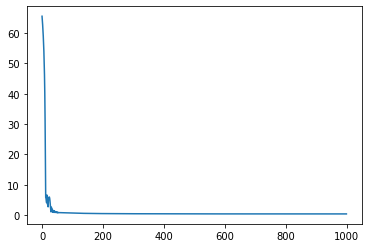

In [ ]:
eps = np.arange(0, num_epochs)
plt.plot(eps, mse_list)

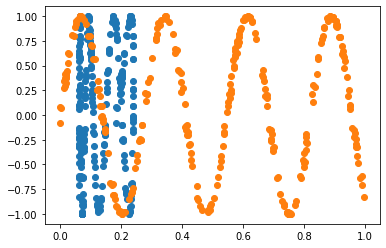

In [ ]:
plt.scatter(y2, darr)
plt.scatter(x, darr)